# Auckland House Prices Analysis

In [96]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Required Datas

In [11]:
df = pd.read_csv('Dataset for Assignment.csv')
otago = pd.read_excel(io = "data.xlsx")

##### Functions

In [19]:
def get_population(lat, longi):
    url = 'https://koordinates.com/services/query/v1/vector.json'
    params = {
        'key' : '5c5f9a2fd55c488484563b1cdf37030e',
        'layer' : '104612',
        'x' : longi,
        'y' : lat       
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        return response.status_code
    population = response.json()["vectorQuery"]["layers"]["104612"]["features"][0]["properties"]["C18_CURPop"]
    return pd.Series({"Population": population})

In [15]:
def get_dep_score(sa1):
    data = otago.loc[otago["SA12018_code"] == sa1]
    dep_score = data["NZDep2018"].values[0]
    return pd.Series({"Deprivation Index": dep_score})

##### Apply

In [16]:
df["Population"] = df.apply(lambda x: get_population(x["Latitude"], x["Longitude"]), axis = 1)

In [18]:
df["Deprivation Index"] = df.SA1.apply(get_dep_score)

##### Display

In [22]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9


In [23]:
df.to_csv('Property.csv', index=False)

##### Cleaning Data

In [113]:
df = pd.read_csv('Property.csv')

In [115]:
df["Land area"] = df["Land area"].str.extract("(\d+)").astype(float)

##### Data Types

In [217]:
df.dtypes

Bedrooms               int64
Bathrooms            float64
Address               object
Land area            float64
CV                     int64
Latitude             float64
Longitude            float64
SA1                    int64
0-19 years             int64
20-29 years            int64
30-39 years            int64
40-49 years            int64
50-59 years            int64
60+ years              int64
Suburbs               object
Population             int64
Deprivation Index      int64
dtype: object

##### Basic Statistics

In [221]:
pd.set_option('float_format', '{:.2f}'.format)
df.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,Deprivation Index
count,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00,1051.00
mean,3.78,2.07,856.99,1387520.55,-36.89,174.80,7006319.18,47.55,28.96,27.04,24.13,22.62,29.36,179.91,5.06
std,1.17,0.99,1588.16,1182939.36,0.13,0.12,2591.26,24.69,21.04,17.98,10.94,10.21,21.81,71.06,2.91
min,1.00,1.00,40.00,270000.00,-37.27,174.32,7001130.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00
25%,3.00,1.00,321.00,780000.00,-36.95,174.72,7004415.50,33.00,15.00,15.00,18.00,15.00,18.00,138.00,2.00
50%,4.00,2.00,571.00,1080000.00,-36.89,174.80,7006325.00,45.00,24.00,24.00,24.00,21.00,27.00,174.00,5.00
75%,4.00,3.00,825.00,1600000.00,-36.86,174.88,7008383.50,57.00,36.00,33.00,30.00,27.00,36.00,210.00,8.00
max,17.00,8.00,22240.00,18000000.00,-36.18,175.49,7011028.00,201.00,270.00,177.00,114.00,90.00,483.00,789.00,10.00


##### Check for NaNs

In [119]:
df.isnull().values.any()

True

In [120]:
df.columns[df.isnull().any()]

Index(['Bathrooms', 'Suburbs'], dtype='object')

##### Replacing NaN in Bathrooms column with mean value

In [121]:
df['Bathrooms'].fillna(df['Bathrooms'].mean(), inplace=True)

In [122]:
df.columns[df.isnull().any()]

Index(['Suburbs'], dtype='object')

Note: Suburbs won't matter as it is a string column and will not be used for any modeling

# Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12693fd978>,
      dtype=object)

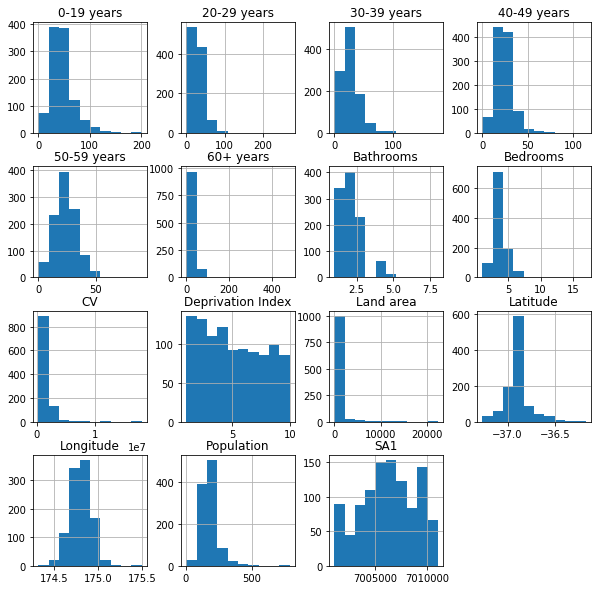

In [97]:
df.hist(figsize=(10,10))

The histogram display a result that is within expectation, some interesting observation are
1. The vast majority of houses in New Zealand seems to contain 3 bedrooms.
2. The distribution of different age group are generally similar to each other, with the exception of 60+ years olds.
3. However the number of people seem to be decreasing as age grows.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


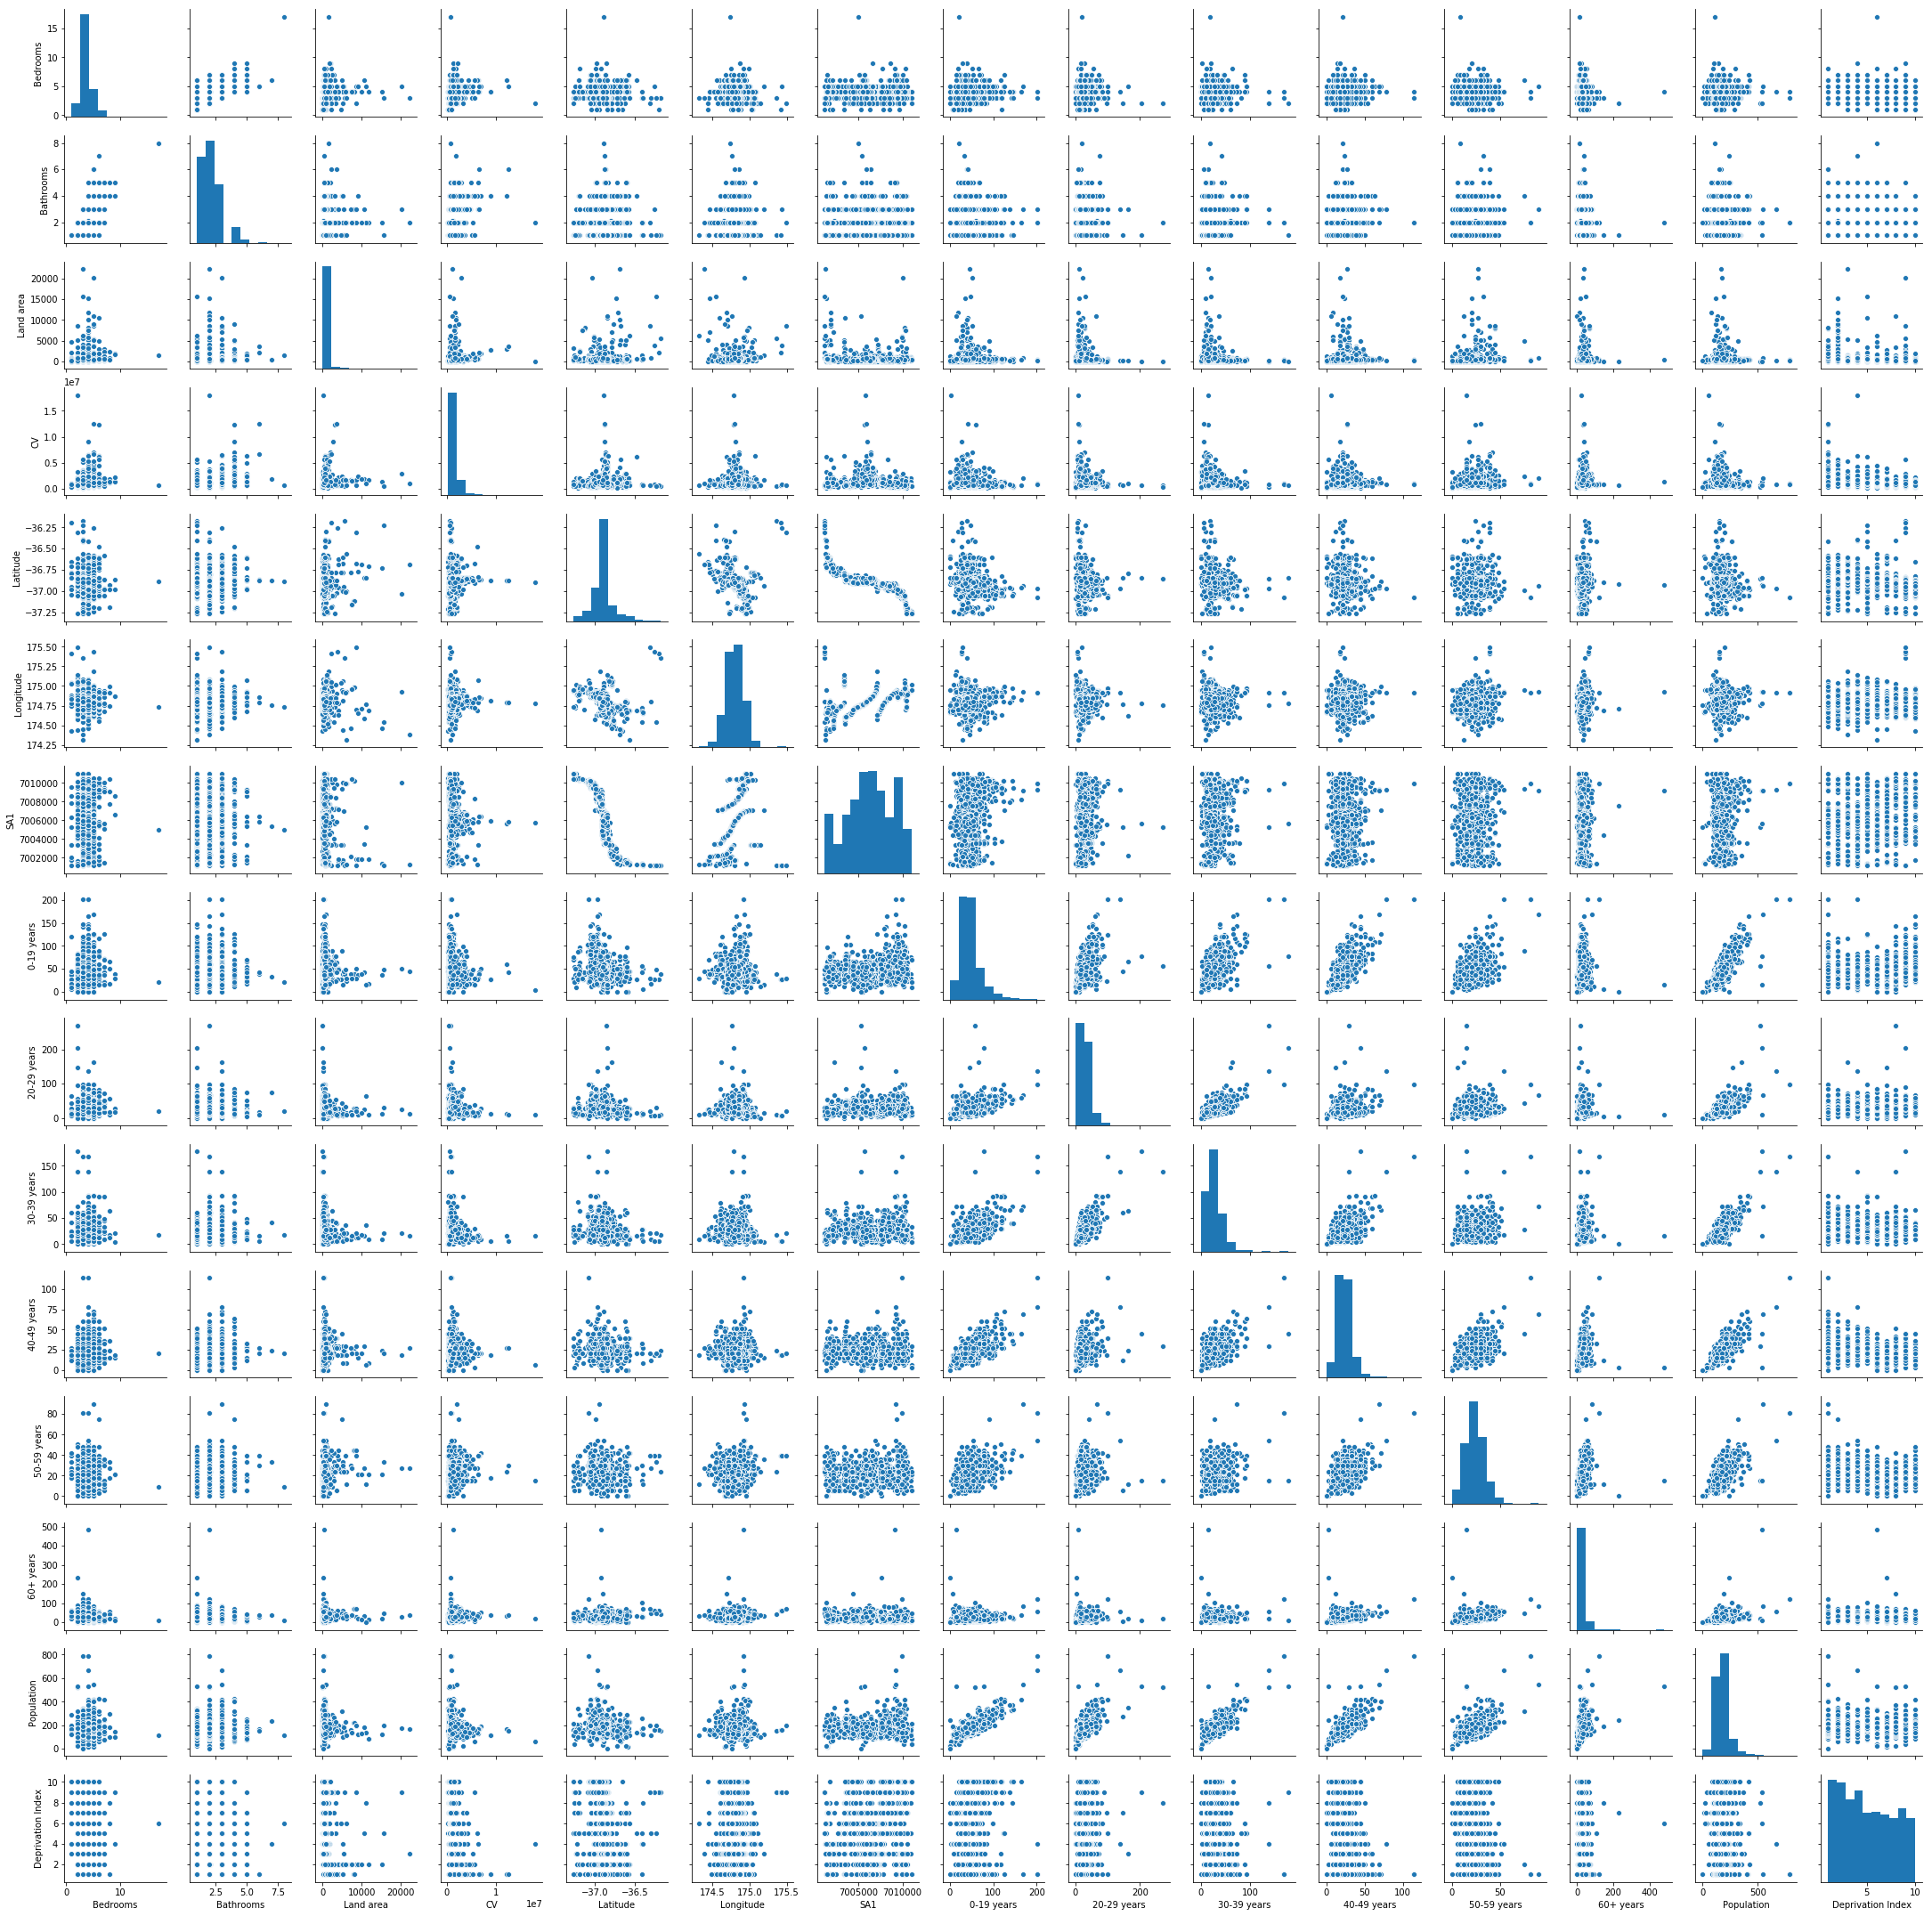

In [101]:
sns.pairplot(df, size=2.0)

Observations

1. SA1 vs Longitude/Latitude - There is a very distinct and unique pattern in the plot with both comparsions, SA1 are aggregations of geographic areas so it make sense to have the S shaped plot but nonetheless, very cool to see
2. All age group have a linear relationship with each other(i.e for one 19-29 years old, there is one 30-39 years old). This does shows that the distribution of population in New Zealand are very even across the ages.

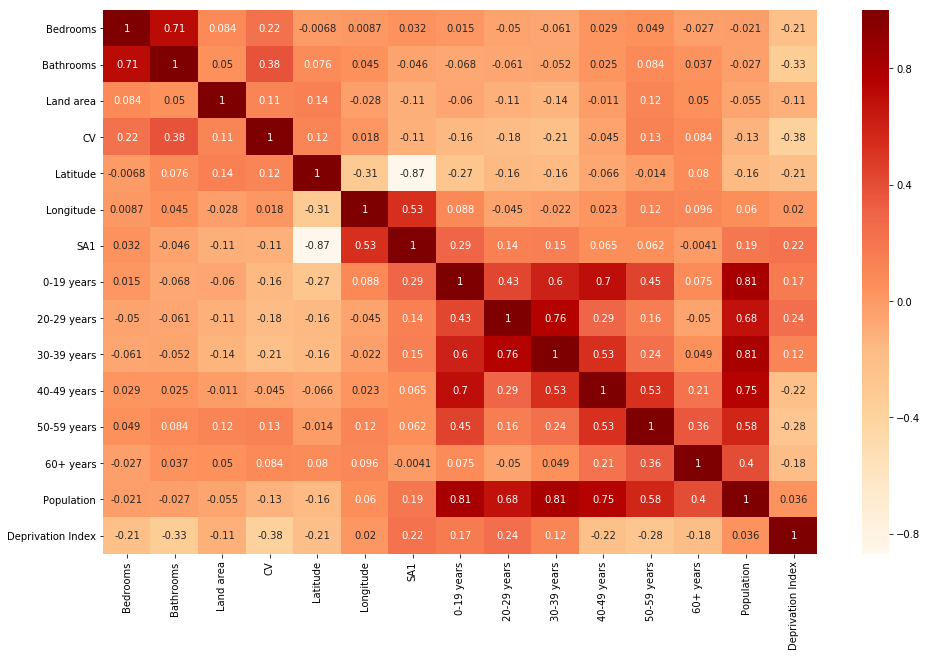

In [103]:
ax, fig = plt.subplots(figsize=(16,10))
c_m = df.corr()
sns.heatmap(c_m, annot = True, cmap = "OrRd")
plt.show()

Observations

1. Bathrooms and bedrooms seem to be positively correlated.
2. CV have little relationship with number of bedrooms, which is what I would have predicted

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


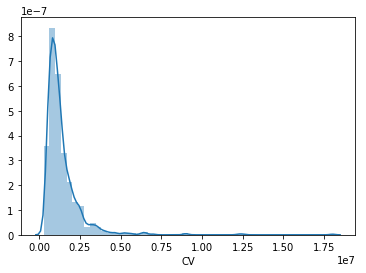

In [241]:
sns.distplot(df['CV'])

##### Machine Learning

In [392]:
from sklearn.model_selection import train_test_split

x = df.drop(["CV", "Address", "Latitude", "Longitude", "Suburbs"], axis = 1)
x.head()

,Bedrooms,Bathrooms,Land area,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,Deprivation Index
0,5,3.00,714.00,7009770,48,27,24,21,24,21,174,6
1,5,3.00,564.00,7009991,42,18,12,21,15,30,129,1
2,6,4.00,626.00,7009991,42,18,12,21,15,30,129,1
3,2,1.00,65.00,7007871,42,6,21,21,12,15,120,2
4,3,1.00,601.00,7008902,93,27,33,30,21,33,231,9


Note: ["Address", "Latitude", "Longitude", "Suburbs"] were dropped because they will not be usefull for learning. Strings and locational data are unlikely to help with prediction.

In [393]:
y = df["CV"]
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [394]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.35, random_state = 25)

In [395]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [396]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [397]:
p = model.predict(test_x)

##### Prediction on your CV

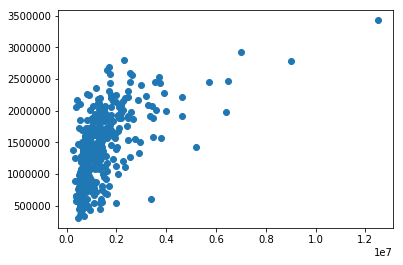

In [398]:
plt.scatter(test_y, p)

In [399]:
model.score(test_x, test_y)

0.3170318054610237